In [1]:
import astropy.units as u
import astropy.constants as const
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# 8.1

Mass defect from different reactions

<img src=attachment:33fd0f3d-e8a2-4960-8b41-8de967c6e98b.png width=20%>
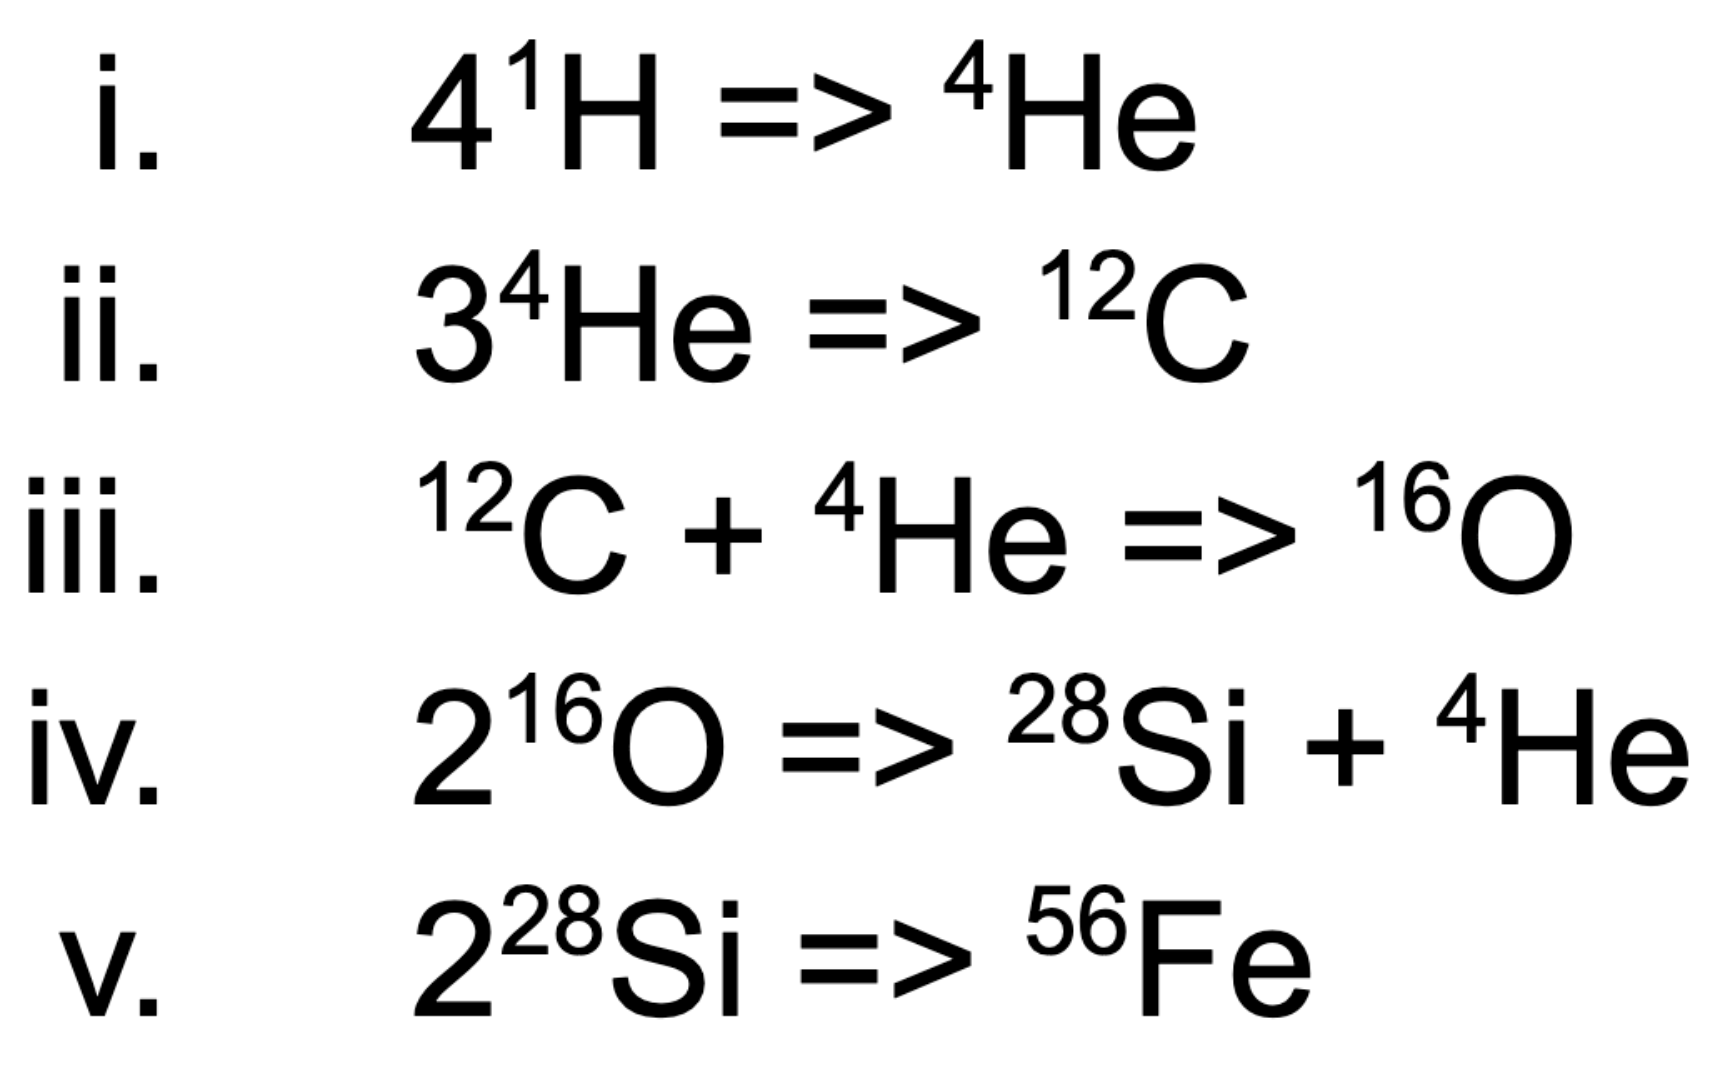

In [3]:
m_H1 = 1.0078
m_He4 = 4.0026
m_C12 = 12
m_O16 = 15.9949
m_Si28 = 27.9769
m_Fe56 = 55.9349

In [4]:
reactions = [
    ["4H1 -> He4", 4 * m_H1, m_He4],
    ["3He4 -> C12", 3 * m_He4, m_C12],
    ["C12 + He4 -> O16", m_C12 + m_He4, m_O16],
    ["2O16 -> Si28 + He4", 2 * m_O16, m_Si28 + m_He4],
    ["2Si28 -> Fe56", 2 * m_Si28, m_Fe56]
]

In [37]:
for label, reactant, product in reactions:
    mass_defect = (reactant - product) / product
    print(f"Mass Defect: {mass_defect:f}, Reaction: {label}")

Mass Defect: 0.007145, Reaction: 4H1 -> He4
Mass Defect: 0.000650, Reaction: 3He4 -> C12
Mass Defect: 0.000481, Reaction: C12 + He4 -> O16
Mass Defect: 0.000322, Reaction: 2O16 -> Si28 + He4
Mass Defect: 0.000338, Reaction: 2Si28 -> Fe56


# 8.4

In [54]:
def minimium_core_mass(t_ign, mu_c=2, mu_e=2):
    return (gasconstant / u.g * K1 * t_ign / (mu_c * mu_e**(5/3) * const.G**2))**(3/4)

In [55]:
minimium_core_mass(t_ign=1e8 * u.K).to(u.Msun)

<Quantity 0.03568833 solMass>

#### THIS BOTHERS ME^^

In [58]:
def m_crit(t_ign):
    return (0.3 * u.Msun * (t_ign / (1e8 * u.K))**(3/4)).to(u.Msun)

In [62]:
for label, t_ign in [("He", 100e6), ("C", 600e6), ("Ne", 900e6), ("O", 1000e6), ("Si", 3000e6)]:
    print(f"{m_crit(t_ign * u.K):1.2f} ({label})")

0.30 solMass (He)
1.15 solMass (C)
1.56 solMass (Ne)
1.69 solMass (O)
3.85 solMass (Si)


# 9.1

In [8]:
def dynamical_timescale(M, R):
    rho_mean = M / (4/3 * np.pi * R**3)
    return np.sqrt(1 / (const.G * rho_mean)).to(u.s)

def thermal_timescale(M, R, L):
    return (const.G * M**2 / (R * L)).to(u.s)

def nuclear_timescale(M, L):
    return ((M.to(u.Msun).value / L.to(u.Lsun).value) * 1e10 * u.yr).to(u.s)

In [9]:
stars = [
    {
        "label": r"1 Msol main sequence",
        "M": 1 * u.Msun,
        "R": 1 * u.Rsun,
        "L": 1 * u.Lsun
    },
    {
        "label": r"60 Msol main sequence",
        "M": 60 * u.Msun,
        "R": 15 * u.Rsun,
        "L": 8e5 * u.Lsun
    },
    {
        "label": r"15 Msol red supergiant",
        "M": 15 * u.Msun,
        "R": 3300 * u.Rsun,
        "L": 4.5e5 * u.Lsun
    },
    {
        "label": r"0.6 Msol white dwarf",
        "M": 0.6 * u.Msun,
        "R": 0.012 * u.Rsun,
        "L": 1e-3 * u.Lsun
    },
]

In [10]:
RED = "\033[0;31m"
GREEN = "\033[0;32m"
BOLD = "\033[1m"
UNDERLINE = "\033[4m"
END = "\033[0m"

In [63]:
for star in stars:
    t_dyn = dynamical_timescale(star["M"], star["R"])
    t_KH = thermal_timescale(star["M"], star["R"], star["L"])
    t_nuc = nuclear_timescale(star["M"], star["L"])
    
    t_min = min(min(t_dyn, t_KH), t_nuc)
    
    print(f"{UNDERLINE}{BOLD}{star['label']}{END}")
    print(f"  t_dyn: {t_dyn:1.1e}, t_KH: {t_KH:1.1e}, t_nuc: {t_nuc:1.1e}")
    print(f"  ratios => {t_dyn / t_min:1.1e} : {t_KH / t_min:1.1e} : {t_nuc / t_min:1.1e}")

1 Msol main sequence
  t_dyn: 3.3e+03 s, t_KH: 9.9e+14 s, t_nuc: 3.2e+17 s
  ratios => 1.0e+00 : 3.0e+11 : 9.7e+13
60 Msol main sequence
  t_dyn: 2.4e+04 s, t_KH: 3.0e+11 s, t_nuc: 2.4e+13 s
  ratios => 1.0e+00 : 1.2e+07 : 9.7e+08
15 Msol red supergiant
  t_dyn: 1.6e+08 s, t_KH: 1.5e+08 s, t_nuc: 1.1e+13 s
  ratios => 1.1e+00 : 1.0e+00 : 7.0e+04
0.6 Msol white dwarf
  t_dyn: 5.5e+00 s, t_KH: 3.0e+19 s, t_nuc: 1.9e+20 s
  ratios => 1.0e+00 : 5.4e+18 : 3.4e+19
